# 1. Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Retrieve the dataset

In [3]:
df=pd.read_csv('Super.csv',sep='\t')

# 3. Data Sampling

In [4]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country/Region,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020/11/08,2020/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,"261,96",2,0,"41,9136"
1,2,CA-2020-152156,2020/11/08,2020/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...","731,94",3,0,"219,582"
2,3,CA-2020-138688,2020/06/12,2020/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,"14,62",2,0,"6,8714"
3,4,US-2019-108966,2019/10/11,2019/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"957,5775",5,"0,45","-383,031"
4,5,US-2019-108966,2019/10/11,2019/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368",2,"0,2","2,5164"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          9994 non-null   int64  
 1   Order_ID        9994 non-null   object 
 2   Order_Date      9994 non-null   object 
 3   Ship_Date       9994 non-null   object 
 4   Ship_Mode       9994 non-null   object 
 5   Customer_ID     9994 non-null   object 
 6   Customer_Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal_Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product_ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub_Category    9994 non-null   object 
 16  Product_Name    9994 non-null   object 
 17  Sales           9994 non-null   o

# 4. Check/Handle Null Values

In [6]:
df.isna().sum()

Row_ID             0
Order_ID           0
Order_Date         0
Ship_Date          0
Ship_Mode          0
Customer_ID        0
Customer_Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal_Code       11
Region             0
Product_ID         0
Category           0
Sub_Category       0
Product_Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

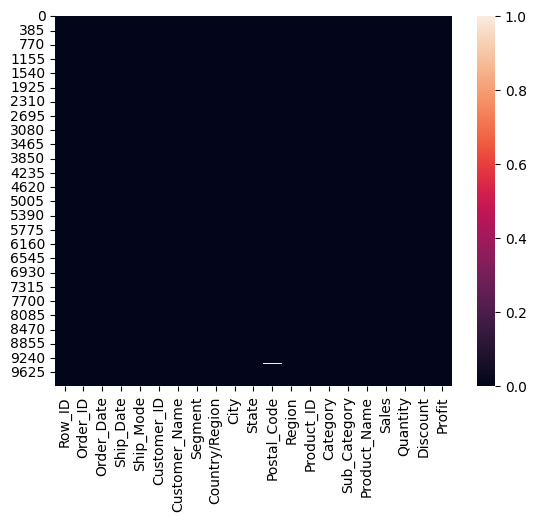

In [7]:
sns.heatmap(df.isna())
plt.show()

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Postal_Code       0
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

# 5. Check/Handle Duplicates

In [10]:
print('Are there any duplicates :',df.duplicated().any())

Are there any duplicates : False


# 6. Data Preprocessing

#### 6.1 **Create proper date format**

In [11]:
df.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country/Region,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020/11/08,2020/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,"261,96",2,0,"41,9136"
1,2,CA-2020-152156,2020/11/08,2020/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...","731,94",3,0,"219,582"


In [12]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          9983 non-null   int64         
 1   Order_ID        9983 non-null   object        
 2   Order_Date      9983 non-null   datetime64[ns]
 3   Ship_Date       9983 non-null   object        
 4   Ship_Mode       9983 non-null   object        
 5   Customer_ID     9983 non-null   object        
 6   Customer_Name   9983 non-null   object        
 7   Segment         9983 non-null   object        
 8   Country/Region  9983 non-null   object        
 9   City            9983 non-null   object        
 10  State           9983 non-null   object        
 11  Postal_Code     9983 non-null   float64       
 12  Region          9983 non-null   object        
 13  Product_ID      9983 non-null   object        
 14  Category        9983 non-null   object        
 15  Sub_Categ

In [14]:
df['Ship_Date']=pd.to_datetime(df['Ship_Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          9983 non-null   int64         
 1   Order_ID        9983 non-null   object        
 2   Order_Date      9983 non-null   datetime64[ns]
 3   Ship_Date       9983 non-null   datetime64[ns]
 4   Ship_Mode       9983 non-null   object        
 5   Customer_ID     9983 non-null   object        
 6   Customer_Name   9983 non-null   object        
 7   Segment         9983 non-null   object        
 8   Country/Region  9983 non-null   object        
 9   City            9983 non-null   object        
 10  State           9983 non-null   object        
 11  Postal_Code     9983 non-null   float64       
 12  Region          9983 non-null   object        
 13  Product_ID      9983 non-null   object        
 14  Category        9983 non-null   object        
 15  Sub_Categ

In [16]:
df['Order_Yr']=df['Order_Date'].dt.year

In [17]:
df['Order_Mon']=df['Order_Date'].dt.month

#### **6.2 Convert string data type to float for Sales and other numerical columns**

In [18]:
df['Sales']=df['Sales'].str.replace(',','.').astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          9983 non-null   int64         
 1   Order_ID        9983 non-null   object        
 2   Order_Date      9983 non-null   datetime64[ns]
 3   Ship_Date       9983 non-null   datetime64[ns]
 4   Ship_Mode       9983 non-null   object        
 5   Customer_ID     9983 non-null   object        
 6   Customer_Name   9983 non-null   object        
 7   Segment         9983 non-null   object        
 8   Country/Region  9983 non-null   object        
 9   City            9983 non-null   object        
 10  State           9983 non-null   object        
 11  Postal_Code     9983 non-null   float64       
 12  Region          9983 non-null   object        
 13  Product_ID      9983 non-null   object        
 14  Category        9983 non-null   object        
 15  Sub_Categ

In [20]:
df['Profit']=df['Profit'].str.replace(',','.').astype('float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          9983 non-null   int64         
 1   Order_ID        9983 non-null   object        
 2   Order_Date      9983 non-null   datetime64[ns]
 3   Ship_Date       9983 non-null   datetime64[ns]
 4   Ship_Mode       9983 non-null   object        
 5   Customer_ID     9983 non-null   object        
 6   Customer_Name   9983 non-null   object        
 7   Segment         9983 non-null   object        
 8   Country/Region  9983 non-null   object        
 9   City            9983 non-null   object        
 10  State           9983 non-null   object        
 11  Postal_Code     9983 non-null   float64       
 12  Region          9983 non-null   object        
 13  Product_ID      9983 non-null   object        
 14  Category        9983 non-null   object        
 15  Sub_Categ

#### 6.3 **Below we derive the cost of sales column**

In [22]:
df['cost_of_sales']=df['Sales']-df['Profit']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          9983 non-null   int64         
 1   Order_ID        9983 non-null   object        
 2   Order_Date      9983 non-null   datetime64[ns]
 3   Ship_Date       9983 non-null   datetime64[ns]
 4   Ship_Mode       9983 non-null   object        
 5   Customer_ID     9983 non-null   object        
 6   Customer_Name   9983 non-null   object        
 7   Segment         9983 non-null   object        
 8   Country/Region  9983 non-null   object        
 9   City            9983 non-null   object        
 10  State           9983 non-null   object        
 11  Postal_Code     9983 non-null   float64       
 12  Region          9983 non-null   object        
 13  Product_ID      9983 non-null   object        
 14  Category        9983 non-null   object        
 15  Sub_Categ

#### 6.4 **Drop columns we dont use,to reduce the dataframe size**

In [24]:
df.drop(['Row_ID','Postal_Code','Discount'],axis=1,inplace=True)

#### 6.5 **New dataframe**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        9983 non-null   object        
 1   Order_Date      9983 non-null   datetime64[ns]
 2   Ship_Date       9983 non-null   datetime64[ns]
 3   Ship_Mode       9983 non-null   object        
 4   Customer_ID     9983 non-null   object        
 5   Customer_Name   9983 non-null   object        
 6   Segment         9983 non-null   object        
 7   Country/Region  9983 non-null   object        
 8   City            9983 non-null   object        
 9   State           9983 non-null   object        
 10  Region          9983 non-null   object        
 11  Product_ID      9983 non-null   object        
 12  Category        9983 non-null   object        
 13  Sub_Category    9983 non-null   object        
 14  Product_Name    9983 non-null   object        
 15  Sales    

#### 6.6 **View of the statistical figures for numerical columns**

In [26]:
df.describe()

,Order_Date,Ship_Date,Sales,Quantity,Profit,Order_Yr,Order_Mon,cost_of_sales
count,9983,9983,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000
mean,2020-04-29 21:46:43.045176832,2020-05-03 20:46:42.684563712,229.216818,3.788741,28.463592,2019.721627,7.813783,200.753225
min,2018-01-03 00:00:00,2018-01-07 00:00:00,0.444000,1.000000,-6599.978000,2018.000000,1.000000,0.554400
25%,2019-05-22 00:00:00,2019-05-26 00:00:00,17.280000,2.000000,1.727100,2019.000000,5.000000,12.688200
50%,2020-06-26 00:00:00,2020-06-29 00:00:00,54.384000,3.000000,8.643600,2020.000000,9.000000,41.661500
75%,2021-05-14 00:00:00,2021-05-18 00:00:00,209.905000,5.000000,29.315200,2021.000000,11.000000,182.017800
max,2021-12-30 00:00:00,2022-01-05 00:00:00,22638.480000,14.000000,8399.976000,2021.000000,12.000000,24449.558400
std,NaN,NaN,621.909610,2.223566,234.122107,1.123750,3.280710,550.052595


# 7. **Check/Handle Categorical/Ordinal Data**

In [27]:
print(df['Ship_Mode'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [28]:
print('Number of unique customers =',df['Customer_ID'].nunique())

Number of unique customers = 793


In [29]:
print('Unique Segments',df['Segment'].unique())

Unique Segments ['Consumer' 'Corporate' 'Home Office']


In [30]:
print('Number of cities in which products are sold =',df['City'].nunique())

Number of cities in which products are sold = 531


In [31]:
print('Number of Cities per state',df.groupby(['State'])['City'].nunique().sort_values(ascending=False))

Number of Cities per state State
California              81
Texas                   54
Florida                 36
Illinois                33
Ohio                    24
Michigan                21
North Carolina          19
New Jersey              18
New York                18
Washington              17
Colorado                16
Tennessee               15
Indiana                 15
Massachusetts           14
Minnesota               13
Arizona                 13
Wisconsin               13
Virginia                13
Georgia                 11
Connecticut             10
Utah                    10
Oregon                   9
Missouri                 9
Arkansas                 9
Iowa                     8
Alabama                  8
Kentucky                 8
Pennsylvania             8
Maryland                 7
Oklahoma                 7
New Mexico               7
Idaho                    6
South Carolina           6
Montana                  5
Kansas                   5
Louisiana             

In [32]:
print('Number of states in which products are sold =',df['State'].nunique())

Number of states in which products are sold = 48


In [33]:
print('Regions',df['Region'].unique())

Regions ['South' 'West' 'Central' 'East']


In [34]:
print('Number of products =',df['Product_ID'].nunique())

Number of products = 1861


In [35]:
print('The Product Categories :',df['Category'].unique())

The Product Categories : ['Furniture' 'Office Supplies' 'Technology']


In [36]:
print('The Sub-Categories :',df['Sub_Category'].unique())

The Sub-Categories : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [37]:
print('The number of subcategories =',df.groupby('Category')['Sub_Category'].nunique().sort_values(ascending=False))

The number of subcategories = Category
Office Supplies    9
Furniture          4
Technology         4
Name: Sub_Category, dtype: int64


In [38]:
print('Product_Name',df['Product_Name'].nunique())

Product_Name 1848


# Data Exploration

### 1. Analysis of Sales,Cost and Gross Margin

In [39]:
print('Total Sales =',round(df['Sales'].sum(),2))

Total Sales = 2288271.49


In [40]:
print('Total Cost Sales =',round(df['cost_of_sales'].sum(),2))

Total Cost Sales = 2004119.45


In [41]:
print('Gross Margin =',round(round(df['Sales'].sum(),2)-round(df['cost_of_sales'].sum(),2),2))

Gross Margin = 284152.04


In [42]:
print('Gross Profit % =',round(round(round(df['Sales'].sum(),2)-round(df['cost_of_sales'].sum(),2),2)/round(df['Sales'].sum(),2),2))

Gross Profit % = 0.12


In [43]:
df.groupby('Order_Yr')[['Sales','cost_of_sales','Profit']].sum()

,Sales,cost_of_sales,Profit
Order_Yr,,,
2018,484247.4981,434703.5240,49543.9741
2019,465412.4090,404985.7323,60426.6767
2020,606238.5380,525232.4391,81006.0989
2021,732373.0452,639197.7515,93175.2937


###### Yoy change Sales

In [44]:
Years=df.groupby('Order_Yr')['Sales'].sum()

###### Previous year sales

In [45]:
Shift=Years.shift(1)

###### Yoy percent change

In [46]:
print('Yoy% Sales =',round((Years-Shift)/Shift,2))

Yoy% Sales = Order_Yr
2018     NaN
2019   -0.04
2020    0.30
2021    0.21
Name: Sales, dtype: float64


##### We can see from the above calculation that sales decreased by 4% from 2018 to 2019.There was tremendous growth from the last two years,2020(30%) and 2021(21%),even though there has been a slight decrease from 2020 to 2021.

###### Cost of sales by year

In [47]:
Cos_yr=df.groupby('Order_Yr')['cost_of_sales'].sum()

###### Previous years sales

In [48]:
Cos_yr_Shift=Cos_yr.shift(1)

###### Yoy change %

In [49]:
print('Yoy% Cost =',round((Cos_yr-Cos_yr_Shift)/Cos_yr_Shift,2))

Yoy% Cost = Order_Yr
2018     NaN
2019   -0.07
2020    0.30
2021    0.22
Name: cost_of_sales, dtype: float64


#### Cost of sales also decreased in 2019 in line with downturn in sales.But as observed with sales,there was a massive increase in 2020 and 2021.

### 2. Sales by categorical data

###### Customer Sales

In [50]:
print('Top 10 Customers by Sales',df.groupby('Customer_ID')['Sales'].sum().nlargest(10))

Top 10 Customers by Sales Customer_ID
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
KL-16645    14175.229
SC-20095    14142.334
HL-15040    12873.298
SE-20110    12209.438
CC-12370    12129.072
Name: Sales, dtype: float64


###### City Sales

In [51]:
print('Top 10 ',df.groupby('City')['Sales'].sum().nlargest(10))

Top 10  City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64


##### The top two cities by sales are New York and Los Angeles

###### State Sales

In [52]:
print('Top 10 ',df.groupby('State')['Sales'].sum().nlargest(10))

Top 10  State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


##### The top two states by sales are California and New York

###### State/City sales

In [53]:
print('Top 10 ',df.groupby(['State','City'])['Sales'].sum().nlargest(10))

Top 10  State         City         
New York      New York City    256368.1610
California    Los Angeles      175851.3410
Washington    Seattle          119540.7420
California    San Francisco    112669.0920
Pennsylvania  Philadelphia     109077.0130
Texas         Houston           64504.7604
Illinois      Chicago           48539.5410
California    San Diego         47521.0290
Michigan      Detroit           42446.9440
Florida       Jacksonville      39133.3280
Name: Sales, dtype: float64


##### The top two cities by state are New York city and Los Angeles

###### Regional Sales

In [54]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       725457.8245
East       669851.8700
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

###### State/Region Sales

In [55]:
print('Top 10 ',df.groupby(['State','Region'])['Sales'].sum().nlargest(10))

Top 10  State         Region 
California    West       457687.6315
New York      East       310876.2710
Texas         Central    170188.0458
Washington    West       138641.2700
Pennsylvania  East       116511.9140
Florida       South       89473.7080
Illinois      Central     80166.1010
Ohio          East        78258.1360
Michigan      Central     76269.6140
Virginia      South       70636.7200
Name: Sales, dtype: float64


##### The top two regions are the west and east regions which is in line with State/City analysis 

###### Category/Subcategory sales

In [56]:
print('Top 10 ',df.groupby(['Category','Sub_Category'])['Sales'].sum().nlargest(10))

Top 10  Category         Sub_Category
Technology       Phones          328712.3040
Furniture        Chairs          327733.9030
Office Supplies  Storage         222279.3180
Furniture        Tables          206965.5320
Office Supplies  Binders         203412.7330
Technology       Machines        189238.6310
                 Accessories     167075.3080
                 Copiers         149528.0300
Furniture        Bookcases       110475.0963
Office Supplies  Appliances      106989.2210
Name: Sales, dtype: float64


##### The top selling categories are technology and furniture in which cellphones and tables are the top selling subcategories

### 3. Analysis of Quantities Sold

###### Total Quantities Sold

In [57]:
print('Total Quantity Sold =',df['Quantity'].sum())

Total Quantity Sold = 37823


###### Quantities sold by year

In [58]:
df.groupby('Order_Yr')['Quantity'].sum()

Order_Yr
2018     7581
2019     7971
2020     9811
2021    12460
Name: Quantity, dtype: int64

###### YOY change 

In [59]:
Qty_yr=df.groupby('Order_Yr')['Quantity'].sum()

In [60]:
Qty_shift=Qty_yr.shift(1)

In [61]:
print('Yoy%',round((Qty_yr-Qty_shift)/Qty_shift,2))

Yoy% Order_Yr
2018     NaN
2019    0.05
2020    0.23
2021    0.27
Name: Quantity, dtype: float64


#### Quantities sold have been increasing consistently over the years,which suggests that consumer spending is very healthy at the moment.

### 4. Quantity by Categorical data

###### Customers by quantity

In [62]:
print('Top 10 ',df.groupby('Customer_ID')['Quantity'].sum().nlargest(10))

Top 10  Customer_ID
JD-15895    150
WB-21850    146
JL-15835    143
PP-18955    138
SC-20725    133
EP-13915    124
CB-12025    122
CK-12205    122
EH-13765    120
MA-17560    117
Name: Quantity, dtype: int64


#### This is very interesting that the top customer by dollar spent is different from customer by quantity,which would suggest that dollar spent customer is purchasing high value items.

###### Segment Quantities

In [63]:
df.groupby('Segment')['Quantity'].sum()

Segment
Consumer       19509
Corporate      11575
Home Office     6739
Name: Quantity, dtype: int64

#### This further enhances the consumer spend health as the top segment is the consumer which far outsrips the corporate segment.

###### City Quantities

In [64]:
print('Top 10 ',df.groupby('City')['Quantity'].sum().nlargest(10))

Top 10  City
New York City    3417
Los Angeles      2879
Philadelphia     1981
San Francisco    1935
Seattle          1590
Houston          1466
Chicago          1132
Columbus          836
San Diego         670
Springfield       649
Name: Quantity, dtype: int64


#### No suprises,as we observed earlier with dollars spent,the top two are still New York and Los Angeles

######  State Quantities

In [65]:
print('Top 10 ',df.groupby('State')['Quantity'].sum().nlargest(10))

Top 10  State
California        7667
New York          4224
Texas             3724
Pennsylvania      2153
Washington        1883
Illinois          1845
Ohio              1759
Florida           1379
North Carolina     983
Michigan           946
Name: Quantity, dtype: int64


#### Again no suprises,the top two are still California and New York

###### State/City quantities

In [66]:
print('Top 10 ',df.groupby(['State','City'])['Quantity'].sum().nlargest(10))

Top 10  State         City         
New York      New York City    3417
California    Los Angeles      2879
Pennsylvania  Philadelphia     1981
California    San Francisco    1935
Washington    Seattle          1590
Texas         Houston          1466
Illinois      Chicago          1132
California    San Diego         670
Texas         Dallas            555
Ohio          Columbus          464
Name: Quantity, dtype: int64


#### Same as the dollar spent anlaysis no difference when it comes to quantity

###### State/Region quantities

In [67]:
print('Top 10 ',df.groupby(['State','Region'])['Quantity'].sum().nlargest(10))

Top 10  State           Region 
California      West       7667
New York        East       4224
Texas           Central    3724
Pennsylvania    East       2153
Washington      West       1883
Illinois        Central    1845
Ohio            East       1759
Florida         South      1379
North Carolina  South       983
Michigan        Central     946
Name: Quantity, dtype: int64


#### Again with region the quantities sold resemble the dollar spend above

###### Category/Subcategory Quantities

In [68]:
print('Top 10 ',df.groupby(['Category','Sub_Category'])['Quantity'].sum().nlargest(10))

Top 10  Category         Sub_Category
Office Supplies  Binders         5974
                 Paper           5173
Furniture        Furnishings     3563
Technology       Phones          3284
Office Supplies  Storage         3145
                 Art             2994
Technology       Accessories     2967
Furniture        Chairs          2353
Office Supplies  Appliances      1726
                 Labels          1400
Name: Quantity, dtype: int64


#### There is a massive difference between dollar spend and quantities sold.With regards to dollar spend the cellphones and tables subcategories were the top two,yet with quantities sold firstly the category has changed to Office Supplies and subcategories is Binders and Paper.Which would require further anlaysis to find the top segment with the highest sales quantities.

###### Busiest Periods 

In [69]:
df.groupby(['Order_Yr','Order_Mon'])[['Sales','Quantity']].sum()

Sales  Quantity
Order_Yr Order_Mon                       
2018     1           14236.8950       284
         2            4519.8920       159
         3           55691.0090       585
         4           28295.3450       536
         5           23648.2870       466
         6           34595.1276       521
         7           33946.3930       550
         8           27909.4685       609
         9           81777.3508      1000
         10          31453.3930       573
         11          78628.7167      1219
         12          69545.6205      1079
2019     1           18174.0756       236
         2           11951.4110       239
         3           38726.2520       515
         4           34195.2085       543
         5           30131.6865       575
         6           24797.2920       486
         7           28765.3250       557
         8           36898.3322       598
         9           64595.9180      1086
         10          31404.9235       631
         11          70852.4635      1302
         12          74919.5212      1203
2020     1           16870.1810       337
         2           22978.8150       306
         3           51715.8750       579
         4           37455.2890       630
         5           56987.7280       863
         6           40344.5340       742
         7           39261.9630       758
         8           31115.3743       693
         9           73410.0249      1316
         10          59687.7450       767
         11          79411.9658      1406
         12          96999.0430      1414
2021     1           43334.1940       588
         2           20301.1334       363
         3           58872.3528       885
         4           36521.5361       733
         5           44261.1102       887
         6           52981.7257       931
         7           45264.4160       840
         8           63120.8880       884
         9           87866.6520      1660
         10          77776.9232      1133
         11         118447.8250      1840
         12          83624.2888      1716